In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [3]:
#1 Méthode itérative 1: méthode de Dicothomie

#Question 1
def iterativemethod1(f, a, b, epsilone, Nmax):
    k = 0
    if f(a)*f(b) > 0:
        return 'Error'
    else:
        c = (a+b)/2
        while (abs(a-b) > epsilone) & (k<Nmax):
            if f(c) == 0:
                return c, k
            elif f(a) * f(c) < 0:
                b = c
            else:
                a = c
            c = (a+b)/2
            k = k+1
        return c, k

Text(0.5, 1.0, 'f(x)')

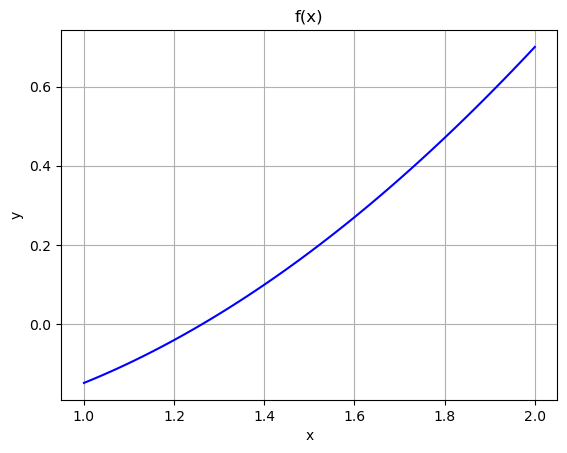

In [4]:
#Question 2, a)
f=lambda x:np.log(1+x**2) - np.sin(x); a=1; b=2
x = np.linspace(a, b, 100);
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x)')

In [5]:
#Question 2, b)
epsilone = 10**(-5)
Nmax = 20
iterativemethod1(f, a, b, epsilone, Nmax)

(1.2620353698730469, 17)

In [6]:
#Methode itérative 2
""" 
#Question 1
def iterativemethod2(a, b, x0, f, epsilone): #This is my own func, not sure
    x = [x0]
    y = [f(x0)]
    while abs(f(len(x))) > epsilone:
        x.append(f(len(x)) - ((b-a)/(f(b)-f(a)))*f(len(x)))
        y.append(f(len(x)))
    return x, y
"""

#Question 1, a)
def iterativemethod2(a,b,x0,f,epsilon):
    x=[x0]
    y=[f(x0)]
    c=((b-a)/(f(b)-f(a)))
    while (abs(y[-1])>epsilon):
        x0=x0-c*f(x0)
        x.append(x0)
        y.append(f(x0))
    return x,y

In [7]:
#Question b)
x = sp.symbols('x')
f=lambda x:sp.log(x**2+1)-sp.sin(x)
df = sp.Lambda(x, sp.diff(f(x), x))
df

Lambda(x, 2*x/(x**2 + 1) - cos(x))

Text(0.5, 1.0, 'Dérivée f(x)')

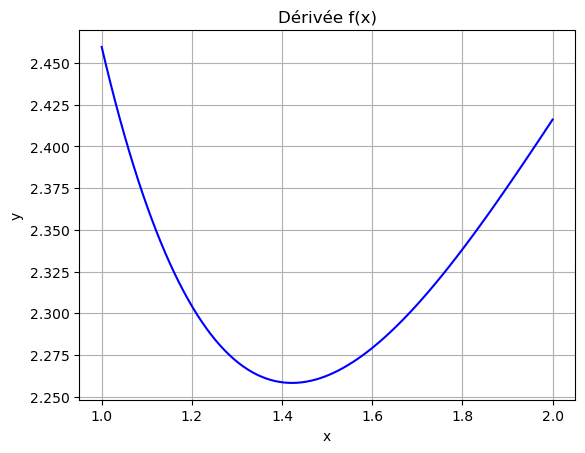

In [8]:
#Question c)
x = np.linspace(1, 2, 100)
df=lambda x:(2*x/x**2+1)-np.cos(x)
plt.plot(x, df(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dérivée f(x)')

In [9]:
#Question d)
#Le dérivé de f est >0 pour tout x £ [1,2] avec f(1)*f(2) < 0
# => Il existe une unique solution de (E) sur [1,2]

In [14]:
#Question 2, a)
[x, y] = iterativemethod2(1, 2, 2, f, 1/10**2)
print(x[-1])

1.25720218732223


In [16]:
#Question b)
print(len(x)-1)

3


In [30]:
print(y[0].evalf()) #f(x0) = 0.70
print(x[1].evalf()) # x1 = 1.17
print(y[1].evalf()) # f(x1) = -0.06
print(x[2].evalf()) # x2 = 1.24
print(y[2].evalf()) # f(x2) = -0.01

0.700140485608419
1.17481443358454
-0.0554384022394473
1.24015413367826
-0.0144646647284601


iterativemethod1() is better than iterativemethod2()
iterativemethod1() is better than iterativemethod2()
iterativemethod1() is better than iterativemethod2()
iterativemethod1() is better than iterativemethod2()
iterativemethod1() is better than iterativemethod2()
iterativemethod1() is better than iterativemethod2()
iterativemethod1() is better than iterativemethod2()


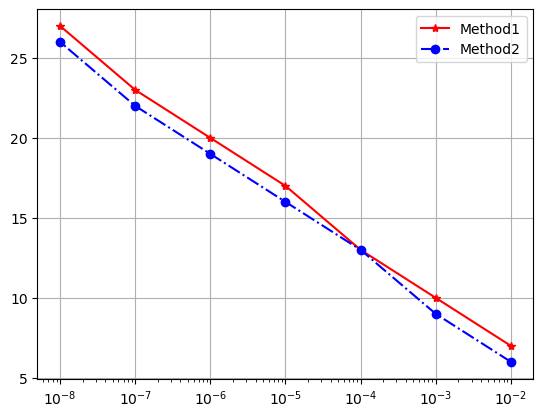

In [38]:
a = 0
b = np.sin(np.pi/4)
Nmax = 10**3
f=lambda x:np.cos(2*x) - x**2
x0 = 0
def compareiteratives(a, b, f, Nmax, x0):
    for i in range(2, 9):
        epsilone = 1/10**i
        [c, k] = iterativemethod1(f, a, b, epsilone, Nmax)
        [x, y] = iterativemethod2(a, b, x0, f, epsilone)
        if(k > len(x) - 1):
            print("iterativemethod1() is worst than iterativemethod2()")
        elif k == len(x) - 1:
            print("iterativemethod1() is equal to iterativemethode2()")
        else:
            print("iterativemethod1() is better than iterativemethod2()")
compareiteratives(a, b, f, Nmax, x0)

"""
The above is my method "UP"
-------
Down below is his method and it is better to be honest "DOWN"
"""
a=0
b=np.pi/4
Nmax =10**3
epsilon=1/10**np.arange(2,9)
f=lambda x: np.cos(2*x)-x**2
Niter1=[]
Niter2=[]
for eps in epsilon:
    [x1,n]=iterativemethod1(f,a,b,eps,Nmax)
    [x2,y]=iterativemethod2(a,b,x0,f,eps)
    Niter1.append(n)
    Niter2.append(len(x2)-1)
plt.plot(epsilon,Niter1,'r-*')
plt.plot(epsilon,Niter2,'bo-.')
plt.xscale('log')
plt.grid(True)
plt.legend(['Method1','Method2'])
